Stephen Coates
November 5, 2024
Question 3 - how many Liverpool men players are English

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url='https://fbref.com/en/squads/822bd0ba/2023-2024/Liverpool-Stats'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [3]:
print(soup.prettify())
type(soup)

<!DOCTYPE html>
<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://cdn.ssref.net/req/202411012" rel="dns-prefetch"/>
  <script>
   /* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */
  window.dataLayer = window.dataLayer ||[];
      function gtag(){dataLayer.push(arguments);}
      gtag('consent','default',{
        'ad_storage':'denied',
        'analytics_storage':'denied',
        'ad_user_data':'denied',
        'ad_personalization':'denied',
        'personalization_storage':'denied',
        'functionality_storage':'granted',
        'security_storage':'granted',
        'wait_for_update': 500
      });
      gtag("set", "ads_data_redaction", true);
  </script>
  <script src="https://cmp.osano.com/16CGnCU

bs4.BeautifulSoup

In [4]:
player_list = [ ]
stats_table = soup.find(class_='stats_table').tbody
stats_table

<tbody> <tr><th class="left" csk="van Dijk Virgil" data-append-csv="e06683ca" data-stat="player" scope="row"><a href="/en/players/e06683ca/Virgil-van-Dijk">Virgil van Dijk</a></th><td class="left poptip" data-stat="nationality" data-tip="NT"><a href="/en/country/NED/Netherlands-Football"><span style="white-space: nowrap"><span class="f-i f-nl" style="">nl</span> NED</span></a></td><td class="center" csk="2.0" data-stat="position">DF</td><td class="center" data-stat="age">32</td><td class="right group_start" data-stat="games">36</td><td class="right" data-stat="games_starts">36</td><td class="right" csk="3177" data-stat="minutes">3,177</td><td class="right" data-stat="minutes_90s">35.3</td><td class="right group_start" data-stat="goals">2</td><td class="right" data-stat="assists">2</td><td class="right" data-stat="goals_assists">4</td><td class="right" data-stat="goals_pens">2</td><td class="right iz" data-stat="pens_made">0</td><td class="right iz" data-stat="pens_att">0</td><td class=

In [5]:
player_list = [ ]
stats_table = soup.find(class_='stats_table').tbody
#print(stats_table)
for row in stats_table.find_all('tr'):
    player = row.find(attrs={'data-stat':'player','scope':'row'}).text
    #print(player)
    nation = row.find(attrs={'data-stat':'nationality'}).text
    games = row.find(attrs={'data-stat':'games_starts'}).text
    min_played = row.find(attrs={'data-stat':'minutes'}).text
    player_list.append({'player':player,'nationality': nation, 'games': games, 'min_played': min_played})
print(player_list)

liverpool_qu3a_player_df = pd.DataFrame(player_list)

[{'player': 'Virgil van Dijk', 'nationality': 'nl NED', 'games': '36', 'min_played': '3,177'}, {'player': 'Luis Díaz', 'nationality': 'co COL', 'games': '32', 'min_played': '2,629'}, {'player': 'Alexis Mac Allister', 'nationality': 'ar ARG', 'games': '31', 'min_played': '2,599'}, {'player': 'Mohamed Salah', 'nationality': 'eg EGY', 'games': '28', 'min_played': '2,534'}, {'player': 'Alisson', 'nationality': 'br BRA', 'games': '28', 'min_played': '2,520'}, {'player': 'Trent Alexander-Arnold', 'nationality': 'eng ENG', 'games': '25', 'min_played': '2,155'}, {'player': 'Dominik Szoboszlai', 'nationality': 'hu HUN', 'games': '25', 'min_played': '2,104'}, {'player': 'Darwin Núñez', 'nationality': 'uy URU', 'games': '22', 'min_played': '2,047'}, {'player': 'Wataru Endo', 'nationality': 'jp JPN', 'games': '20', 'min_played': '1,722'}, {'player': 'Andrew Robertson', 'nationality': 'sct SCO', 'games': '18', 'min_played': '1,693'}, {'player': 'Joe Gomez', 'nationality': 'eng ENG', 'games': '17', 

In [6]:
liverpool_qu3a_player_df

,player,nationality,games,min_played
0,Virgil van Dijk,nl NED,36,"3,177"
1,Luis Díaz,co COL,32,"2,629"
2,Alexis Mac Allister,ar ARG,31,"2,599"
3,Mohamed Salah,eg EGY,28,"2,534"
4,Alisson,br BRA,28,"2,520"
5,Trent Alexander-Arnold,eng ENG,25,"2,155"
6,Dominik Szoboszlai,hu HUN,25,"2,104"
7,Darwin Núñez,uy URU,22,"2,047"
8,Wataru Endo,jp JPN,20,"1,722"
9,Andrew Robertson,sct SCO,18,"1,693"


In [24]:
liverpool_qu3a_player_df.describe()

,player,nationality,games,min_played
count,30,30,30,30
unique,30,18,18,30
top,Virgil van Dijk,eng ENG,0,"3,177"
freq,1,9,7,1


In [8]:
liverpool_qu3a_player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player       38 non-null     object
 1   nationality  38 non-null     object
 2   games        38 non-null     object
 3   min_played   38 non-null     object
dtypes: object(4)
memory usage: 1.3+ KB


In [11]:
# drop players who have no playing time

liverpool_qu3a_player_df.drop(liverpool_qu3a_player_df[liverpool_qu3a_player_df['min_played'] == ''].index, inplace=True)

In [12]:
liverpool_qu3a_player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player       30 non-null     object
 1   nationality  30 non-null     object
 2   games        30 non-null     object
 3   min_played   30 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [43]:
# confirm the numbers

liverpool_qu3a_player_df['nationality'].value_counts()

# strip the code off the front

liverpool_qu3a_player_df['nation'] = liverpool_qu3a_player_df['nationality'].str[-3:]


In [44]:
sns.set()

Text(0, 0.5, 'Nationality')

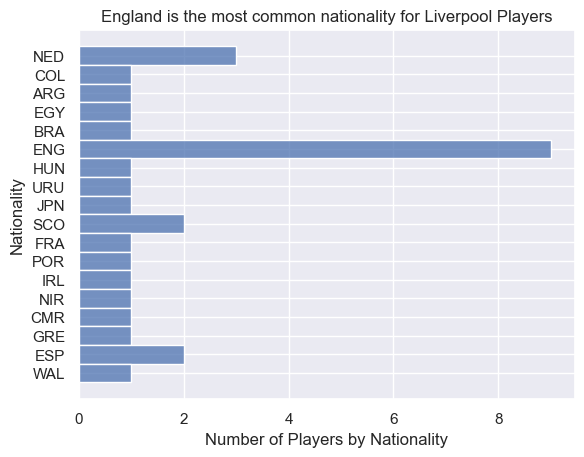

In [45]:
sns.histplot(y = 'nation', data=liverpool_qu3a_player_df)
plt.title('England is the most common nationality for Liverpool Players')
plt.xlabel("Number of Players by Nationality")
plt.ylabel("Nationality")

can i copy this and add another team of two and do a comparison of the nationalities